<a href="https://colab.research.google.com/github/AhmedSSoliman/Text-to-Text-using-GPT2-xl-with-GRADIO-UI/blob/main/Text_to_Text_using_GPT2_xl_with_GRADIO_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Gradio to wrap a text to text interface around GPT-2 

Check out the library on [github](https://github.com/gradio-app/gradio-UI) and see the [getting started](https://gradio.app/getting_started.html) page 
Gradio helps to create UIs for prototyping your machine learning model.

### Installs and Imports

In [1]:
!pip install -q gradio
!pip install -q git+https://github.com/huggingface/transformers.git

     |████████████████████████████████| 3.4 MB 12.1 MB/s 
     |████████████████████████████████| 206 kB 31.8 MB/s 
     |████████████████████████████████| 1.9 MB 27.2 MB/s 
     |████████████████████████████████| 3.0 MB 39.0 MB/s 
     |████████████████████████████████| 961 kB 33.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 895 kB 13.6 MB/s 
     |████████████████████████████████| 3.3 MB 42.1 MB/s 
     |████████████████████████████████| 636 kB 36.9 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 


In [2]:
import gradio as gr
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

### Loading the model and creating the generate function

Note: You can also change `gpt2` to `gpt2-xl` for a much more powerful model!

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-xl")
model = TFGPT2LMHeadModel.from_pretrained("gpt2-xl", pad_token_id=tokenizer.eos_token_id)

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.80G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-xl.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [6]:
model.summary()

Model: "tfgp_t2lm_head_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transformer (TFGPT2MainLayer multiple                  1557611200
Total params: 1,557,611,200
Trainable params: 1,557,611,200
Non-trainable params: 0
_________________________________________________________________


In [4]:
def generate_text(inp):
    input_ids = tokenizer.encode(inp, return_tensors='tf')
    beam_output = model.generate(input_ids, max_length=100, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    output = tokenizer.decode(beam_output[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return ".".join(output.split(".")[:-1]) + "."

###Creating the interface and launching!

In [7]:
output_text = gr.outputs.Textbox()
gr.Interface(generate_text,"textbox", output_text, title="GPT-2",
             description="OpenAI's GPT-2 is an unsupervised language model that \
             can generate coherent text. Go ahead and input a sentence and see what it completes \
             it with! Takes around 20s to run.").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://47008.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://47008.gradio.app')

#### The model is now live on the gradio.app link shown above. Go ahead and open that in a new tab!

Please contact us [here](mailto:team@gradio.app) if you have any questions, or [open an issue](https://github.com/gradio-app/gradio-UI/issues/new/choose) at our github repo.



# **Screenshot**



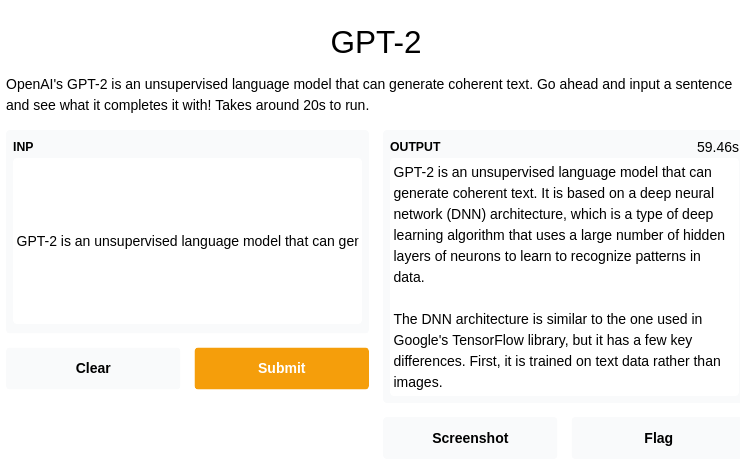